In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import  matplotlib.pyplot as plt
import seaborn as sns
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Major Project/Exoplanets/Data/LR_Data.csv')
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:,-1: ].values
X

array([[ 1.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         1.95000e+01, -1.66500e+01],
       [ 9.69000e-01,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         3.55000e+01, -1.62000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         1.71000e+02, -1.04900e+01],
       ...,
       [ 2.10000e-02,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         1.47000e+01, -1.83694e+03],
       [ 9.20000e-02,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         5.27000e+01, -1.09500e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  1.00000e+00,
         1.08000e+01, -1.94330e+02]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [ ]:
ann = tf.keras.models.Sequential()


In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))


In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))


In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation= 'relu'))


In [ ]:
ann.add(tf.keras.layers.Dense(units = 1, activation= 'sigmoid'))


In [ ]:
ann.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])


In [ ]:
ann.fit(X_train, y_train, batch_size=24, epochs = 30)


Epoch 1/30
319/319 [==============================] - 3s 5ms/step - loss: 0.2545 - accuracy: 0.5282
Epoch 2/30
319/319 [==============================] - 2s 5ms/step - loss: 0.2427 - accuracy: 0.5675
Epoch 3/30
319/319 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.5931
Epoch 4/30
319/319 [==============================] - 1s 3ms/step - loss: 0.2368 - accuracy: 0.6057
Epoch 5/30
319/319 [==============================] - 1s 4ms/step - loss: 0.2331 - accuracy: 0.6186
Epoch 6/30
319/319 [==============================] - 1s 3ms/step - loss: 0.2275 - accuracy: 0.6425
Epoch 7/30
319/319 [==============================] - 1s 2ms/step - loss: 0.2164 - accuracy: 0.6811
Epoch 8/30
319/319 [==============================] - 1s 2ms/step - loss: 0.1973 - accuracy: 0.7208
Epoch 9/30
319/319 [==============================] - 1s 2ms/step - loss: 0.1111 - accuracy: 0.8647
Epoch 10/30
319/319 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9152

Accuracy Score :  0.9759539989545217 

                precision    recall  f1-score   support

     CANDIDATE       0.99      0.96      0.98       935
FALSE POSITIVE       0.97      0.99      0.98       978

      accuracy                           0.98      1913
     macro avg       0.98      0.98      0.98      1913
  weighted avg       0.98      0.98      0.98      1913
 



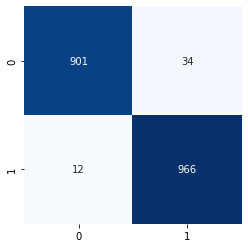

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy Score : ",accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred, target_names=['CANDIDATE', 'FALSE POSITIVE']), "\n")
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.show()

In [ ]:
ann.save('/content/drive/MyDrive/Major Project/Exoplanets/Model/MLP.h5')

In [ ]:
def createModel(unit):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units = unit, activation= 'relu'))
    ann.add(tf.keras.layers.Dense(units = unit, activation= 'relu'))
    ann.add(tf.keras.layers.Dense(units = unit, activation= 'relu'))
    ann.add(tf.keras.layers.Dense(units = unit, activation= 'tanh'))
    ann.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
    return ann

In [ ]:
model=KerasClassifier(build_fn=createModel)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
params={'batch_size':[100, 20, 50, 25, 32], 
        'nb_epoch':[200, 100, 300, 400],
        'unit':[5,6, 10, 11, 12, 15],
           
        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
gs = gs.fit(X, y)
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


96/96 [==============================] - 1s 3ms/step - loss: 0.3808 - accuracy: 0.1157
Best: 0.413477 using {'batch_size': 100, 'nb_epoch': 300, 'unit': 5}
0.221759 (0.150628) with: {'batch_size': 100, 'nb_epoch': 200, 'unit': 5}
0.177328 (0.171740) with: {'batch_size': 100, 'nb_epoch': 200, 'unit': 6}
0.221372 (0.232728) with: {'batch_size': 100, 'nb_epoch': 200, 'unit': 10}
0.141288 (0.151547) with: {'batch_size': 100, 'nb_epoch': 200, 'unit': 11}
0.072997 (0.054332) with: {'batch_size': 100, 'nb_epoch': 200, 'unit': 12}
0.091391 (0.093698) with: {'batch_size': 100, 'nb_epoch': 200, 'unit': 15}
0.241093 (0.201088) with: {'batch_size': 100, 'nb_epoch': 100, 'unit': 5}
0.172822 (0.111321) with: {'batch_size': 100, 'nb_epoch': 100, 'unit': 6}
0.126388 (0.108704) with: {'batch_size': 100, 'nb_epoch': 100, 'unit': 10}
0.105403 (0.075260) with: {'batch_size': 100, 'nb_epoch': 100, 'unit': 11}
0.100485 (0.086581) with: {'batch_size': 100, 'nb_epoch': 100, 'unit': 12}
0.191553 (0.181135) wit

In [ ]:
units = 5
batch_size = 100
epochs = 300
ann = createModel(units)
ann.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/300
77/77 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.3798
Epoch 2/300
77/77 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.4697
Epoch 3/300
77/77 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.5340
Epoch 4/300
77/77 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.5287
Epoch 5/300
77/77 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.5627
Epoch 6/300
77/77 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.5437
Epoch 7/300
77/77 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.3835
Epoch 8/300
77/77 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.2611
Epoch 9/300
77/77 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.1881
Epoch 10/300
77/77 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.1574
Epoch 11/